In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import matplotlib.image as mpimg # for including image
import matplotlib.gridspec as gridspec # for subplot size ratios
import warnings as warnings #package to filter warnings that do not affect the rendering of the plot

# use seaborn style
plt.style.use('seaborn-ticks')

In [7]:
#Import data directly from GitHub
url = 'https://raw.githubusercontent.com/Rom1Garnier/NME/master/Data/%20data_fig2_with_predictions.csv?token=AKeoRELxg9uUQkMaQqPm7jKZbCPjCKOMks5cIk6xwA%3D%3D'
fig2 = pd.read_csv(url)
fig2.head()

,Year,Year_begin,State,PME,PBE_religious,PBE_philosophical,PBE,Enrolled,Percent_PBE,Percent_PME,Percent_PBE_religious,Percent_PBE_philo,Year_change,Mod_pred_PBE,Mod_pred_PME,Mod_pred_Philo,Mod_pred_Religious
0,2003-2004,2003,Alaska,172,128.0,0.0,128,8628,1.483542,1.993510,1.483542,0.0,2013.0,1.538463,1.974789,NaN,NaN
1,2004-2005,2004,Alaska,240,212.0,0.0,212,8627,2.457401,2.781964,2.457401,0.0,2013.0,1.806553,1.881648,NaN,NaN
2,2005-2006,2005,Alaska,166,169.0,0.0,169,9104,1.856327,1.823374,1.856327,0.0,2013.0,2.074644,1.788506,NaN,NaN
3,2006-2007,2006,Alaska,96,208.0,0.0,208,8931,2.328967,1.074908,2.328967,0.0,2013.0,2.342734,1.695365,NaN,NaN
4,2007-2008,2007,Alaska,92,172.0,NaN,172,8918,1.928684,1.031621,1.928684,0.0,2013.0,2.610825,1.602224,NaN,NaN


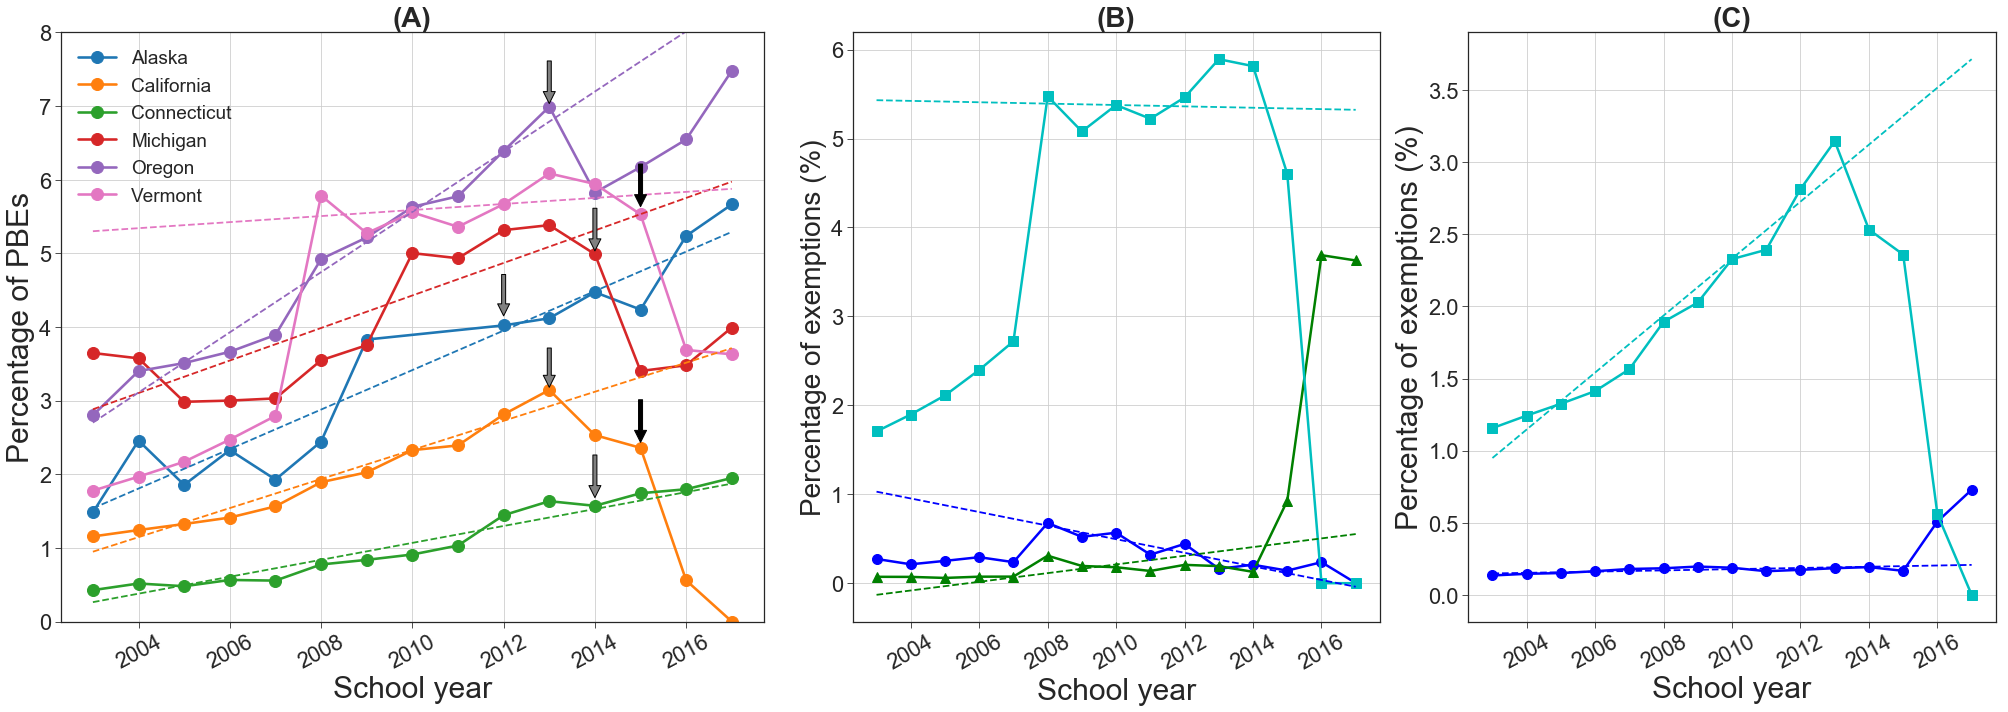

In [9]:
warnings.filterwarnings('ignore') #Ignore warnings due to the use of '__nolegend__'
fig = plt.figure()
fig.set_size_inches(28,10)
plt.subplots_adjust(wspace=0.22)
gs = gridspec.GridSpec(1, 3,width_ratios=[2,1.5,1.5]) #Sets the ratio of the 3 plots, with subplot a little wider for clarity

###########################
# FIG 2a - plot of the time series by state
ax      = fig.add_subplot(gs[0])
handles, label = ax.get_legend_handles_labels()
ax.set_color_cycle(["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#e377c2"]) #set the colors for each state in the plot

for name, group in fig2.groupby('State'):
    group.plot(x='Year_begin', y='Percent_PBE', ax=ax, linewidth=2.6, markersize=12, marker='o', label=name)   
    plt.legend(fontsize=12)
for name, group in fig2.groupby('State'):
    group.plot(x='Year_begin', y='Mod_pred_PBE', ax=ax, linewidth=1.8, linestyle='--', label='_nolegend_')
    
plt.ylabel('Percentage of PBEs', fontsize=30)
plt.ylim(0, 8)
plt.xlabel('School year', fontsize=30)
plt.grid(which='major')
plt.xticks(fontsize=22, rotation=28)
plt.yticks(fontsize=22)
ax.legend(fontsize=19)
ax.set_title('(A)',fontsize= 28, fontweight='bold') # title of plot

#Add arrows where policy changes took place 
#Note that arrows are grey when policy change made it more difficult to obtain NMEs 
#Arrows are black when the changes were more stringent (CA, VT)
ax.annotate(' ', xy=(2012, 4.118567795), xytext=(2012, 4.8),
            arrowprops=dict(facecolor='#808080', shrink=0.05))

ax.annotate(' ', xy=(2013, 3.15), xytext=(2013, 3.8),
            arrowprops=dict(facecolor='#808080', shrink=0.05))

ax.annotate(' ', xy=(2014, 1.65), xytext=(2014, 2.35),
            arrowprops=dict(facecolor='#808080', shrink=0.05))

ax.annotate(' ', xy=(2014, 5), xytext=(2014, 5.7),
            arrowprops=dict(facecolor='#808080', shrink=0.05))

ax.annotate(' ', xy=(2015, 5.6), xytext=(2015, 6.3),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate(' ', xy=(2015, 2.4), xytext=(2015, 3.1),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate(' ', xy=(2013, 7), xytext=(2013, 7.7),
            arrowprops=dict(facecolor='#808080', shrink=0.05))

##############################

# FIG 2b - Detailed dynamics in the state of Vermont
#This includes the raw data of percentages of medical exemtpions (PME), religious exemptions (PBE_religious), and philosophical exemptions (PBE_philo). 
#This also includes predicted data based on a linear regression (see R code)
ax2      = fig.add_subplot(gs[1])
handles, label = ax2.get_legend_handles_labels()

fig2.groupby('State').get_group('Vermont').plot(x='Year_begin', y='Percent_PME', ax=ax2, linewidth=2.5, color='b', markersize=10, marker='o', label='Medical exemptions', title='(B)')
fig2.groupby('State').get_group('Vermont').plot(x='Year_begin', y='Percent_PBE_religious', ax=ax2, linewidth=2.5, color='g', markersize=10, marker='^', label='Religious exemptions', title='(B)')
fig2.groupby('State').get_group('Vermont').plot(x='Year_begin', y='Percent_PBE_philo', ax=ax2, linewidth=2.5, color='c', markersize=10, marker='s', label='Philosophical exemptions', title='(B)')
fig2.groupby('State').get_group('Vermont').plot(x='Year_begin', y='Mod_pred_Religious', ax=ax2, linewidth=1.8, linestyle='--', color='g', label='_nolegend_', title='(B)')
fig2.groupby('State').get_group('Vermont').plot(x='Year_begin', y='Mod_pred_Philo', ax=ax2, linewidth=1.8, linestyle='--', color='c', label='_nolegend_', title='(B)')
fig2.groupby('State').get_group('Vermont').plot(x='Year_begin', y='Mod_pred_PME', ax=ax2, linewidth=1.8, linestyle='--', color='b', label='_nolegend_', title='(B)')

plt.ylabel('Percentage of exemptions (%)', fontsize=28)
plt.xlabel('School year', fontsize=30)
plt.grid(which='major')
plt.xticks(fontsize=22, rotation=30)
plt.yticks(fontsize=22)
ax2.legend_.remove() #Remove the legend - meaning of the different colors is clarified in the caption.
ax2.set_title('(B)',fontsize= 28, fontweight='bold') # title of plot

##############################

# FIG 2c - Detailed dynamics for the state of California 
#Note that total personal belief exemption are used, because CA does not provide separate values for religious and philosophical exemptions
#Model predictions are used as above (see R code)
ax3      = fig.add_subplot(gs[2])
handles, label = ax3.get_legend_handles_labels()

fig2.groupby('State').get_group('California').plot(x='Year_begin', y='Percent_PME', ax=ax3, linewidth=2.5, color='b', markersize=10, marker='o', label='Medical exemptions', title='(C)')
fig2.groupby('State').get_group('California').plot(x='Year_begin', y='Percent_PBE', ax=ax3, linewidth=2.5, color='c', markersize=10, marker='s', label='Philosophical exemptions', title='(C)')
fig2.groupby('State').get_group('California').plot(x='Year_begin', y='Mod_pred_PBE', ax=ax3, linewidth=1.8, color='c', linestyle='--',  title='(C)')
fig2.groupby('State').get_group('California').plot(x='Year_begin', y='Mod_pred_PME', ax=ax3, linewidth=1.8, color='b', linestyle='--',  title='(C)')

plt.ylabel('Percentage of exemptions (%)', fontsize=30)
plt.xlabel('School year', fontsize=30)
plt.grid(which='major')
plt.xticks(fontsize=22, rotation=28)
plt.yticks(fontsize=22)
ax3.legend_.remove()
ax3.set_title('(C)',fontsize= 28, fontweight='bold') # title of plot

plt.tight_layout() #Clean margins for inclusion in manuscript

folder_out = '' #Replace with local folder where the figure would be exported
plt.savefig(folder_out + 'fig2_manuscript.pdf', format='pdf')